In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# Load dataset
file_path = "telecommunications_Dataset.csv"
df = pd.read_csv(file_path)

df.head()


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [2]:
# Basic Information about the Telecomunication dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [3]:
# Checking whether there are null values in the dataset.
df.isna().sum()

,0
account_length,0
voice_mail_plan,0
voice_mail_messages,0
day_mins,0
evening_mins,0
night_mins,0
international_mins,0
customer_service_calls,0
international_plan,0
day_calls,0


In [4]:
# Dimensions of the dataset
df.shape

(3333, 19)

In [5]:
# Finding whether there are any duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

In [6]:
# Data types of each column.
df.dtypes

,0
account_length,int64
voice_mail_plan,int64
voice_mail_messages,int64
day_mins,float64
evening_mins,float64
night_mins,float64
international_mins,float64
customer_service_calls,int64
international_plan,int64
day_calls,int64


In [7]:
# Descriptive statistics of the data.
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [8]:
# Identify likely categorical/binary columns (object or small unique counts)
cat_candidates = [c for c in df.columns if (df[c].dtype == 'object') or (df[c].nunique() <= 10 and df[c].dtype != 'float64')]
cat_candidates = sorted(list(set(cat_candidates)))
print('Categorical / low-cardinality columns detected:', cat_candidates)

for c in cat_candidates:
    print('\nValue counts for', c)
    print(df[c].value_counts(dropna=False))


Categorical / low-cardinality columns detected: ['churn', 'customer_service_calls', 'international_plan', 'voice_mail_plan']

Value counts for churn
churn
0    2850
1     483
Name: count, dtype: int64

Value counts for customer_service_calls
customer_service_calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

Value counts for international_plan
international_plan
0    3010
1     323
Name: count, dtype: int64

Value counts for voice_mail_plan
voice_mail_plan
0    2411
1     922
Name: count, dtype: int64


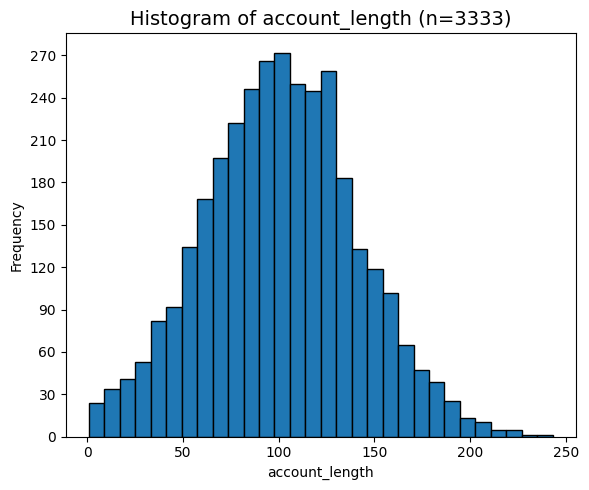

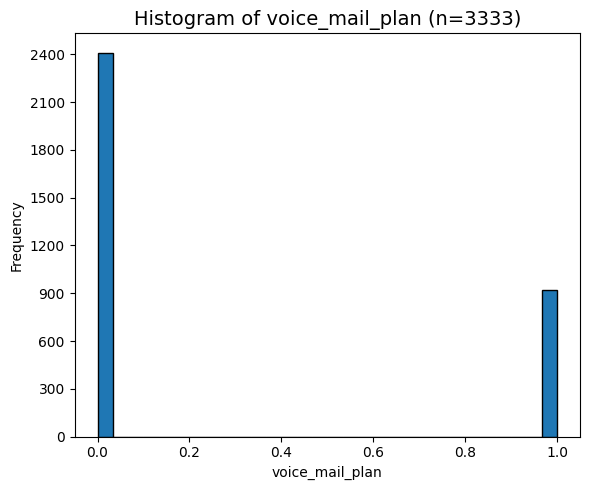

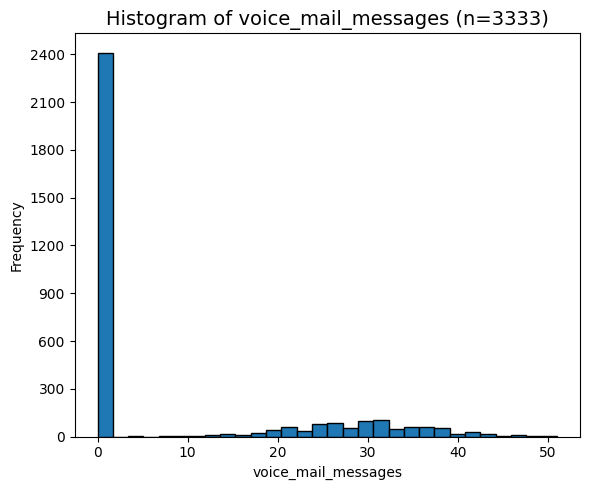

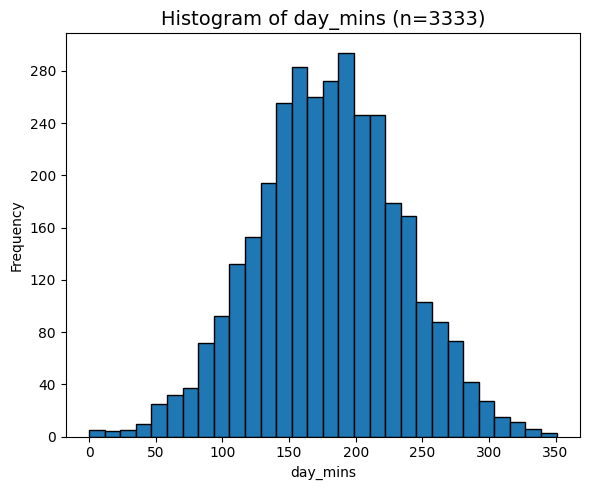

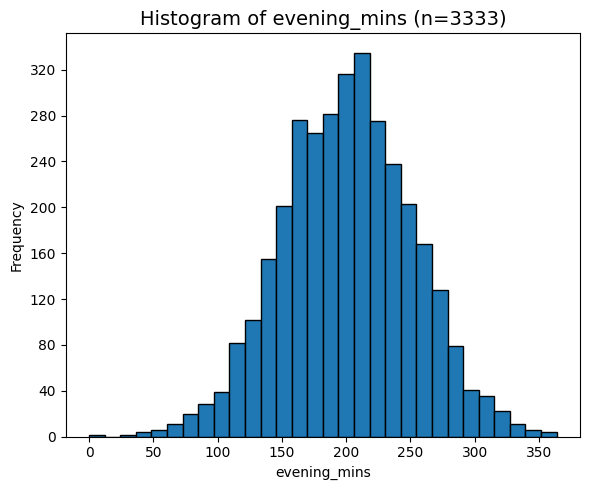

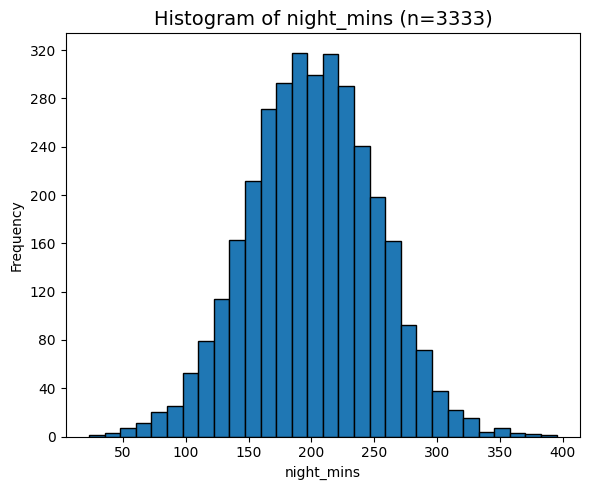

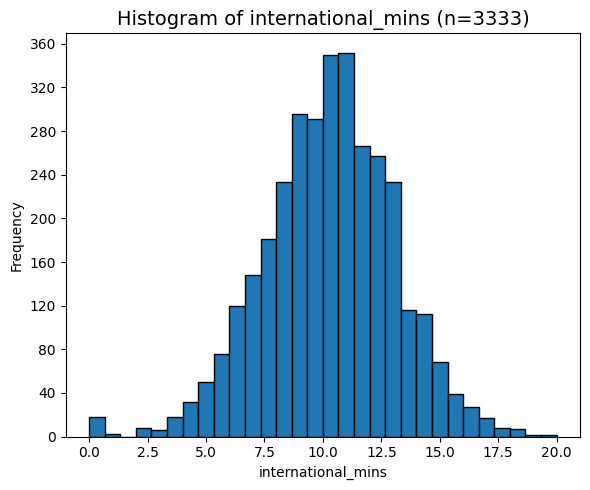

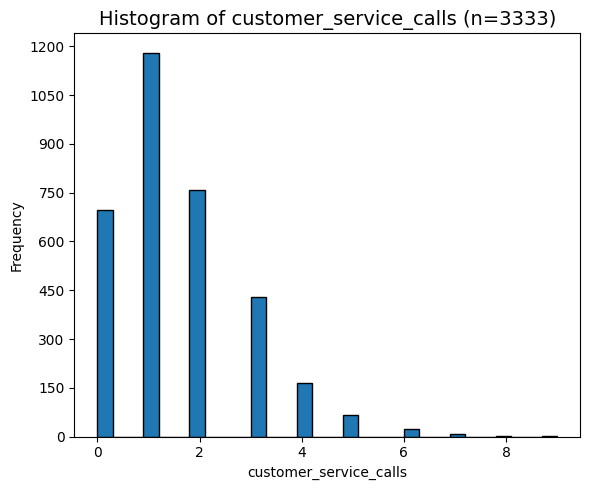

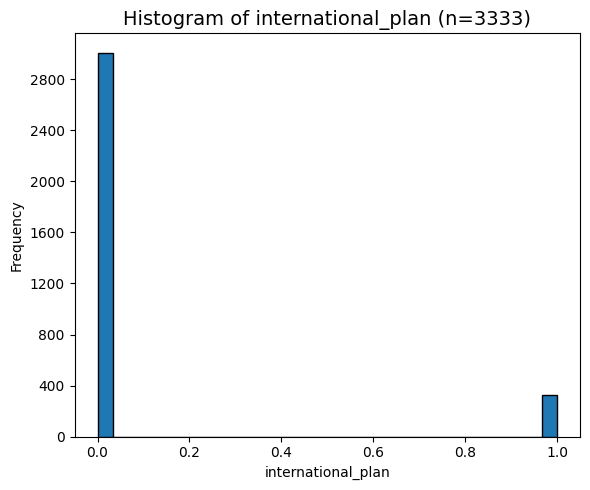

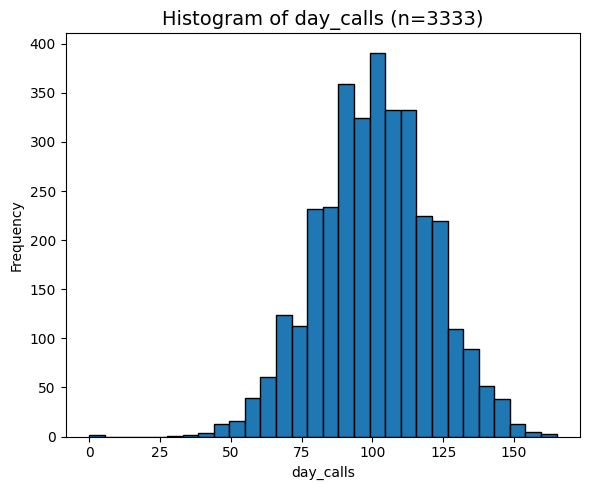

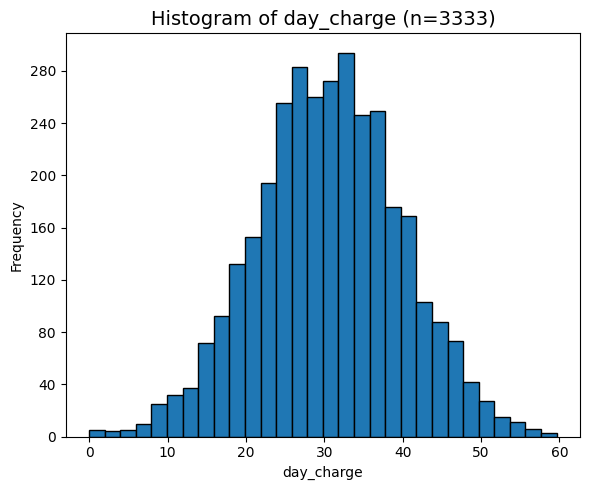

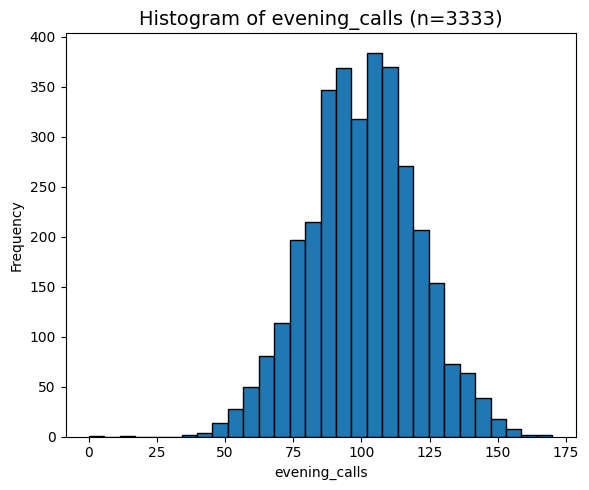

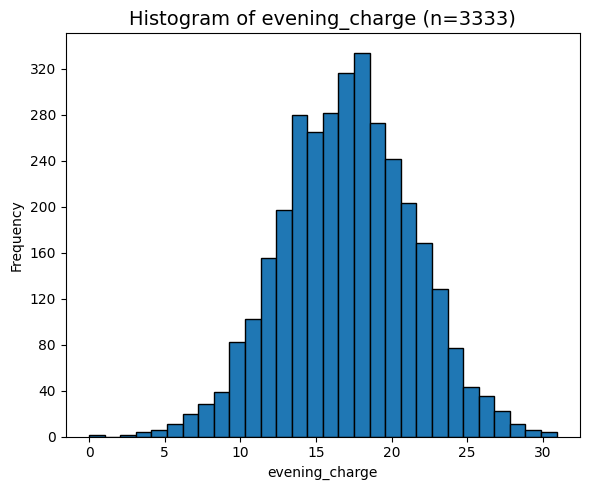

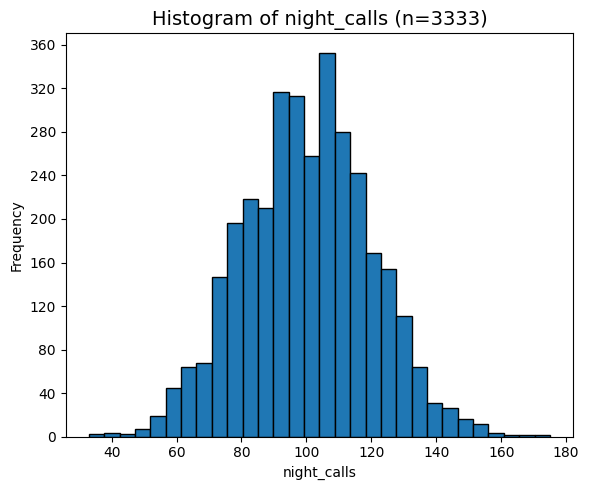

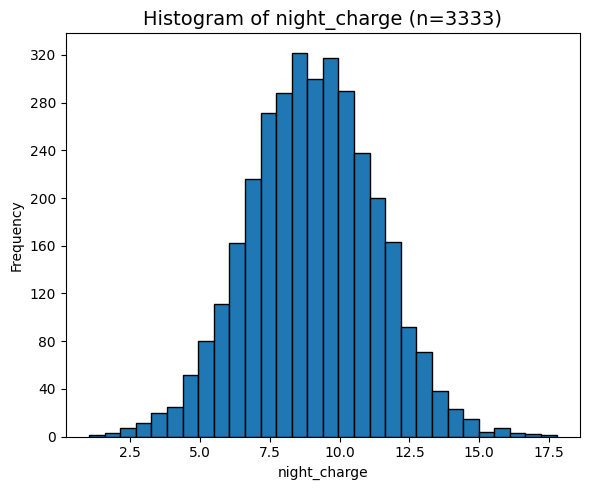

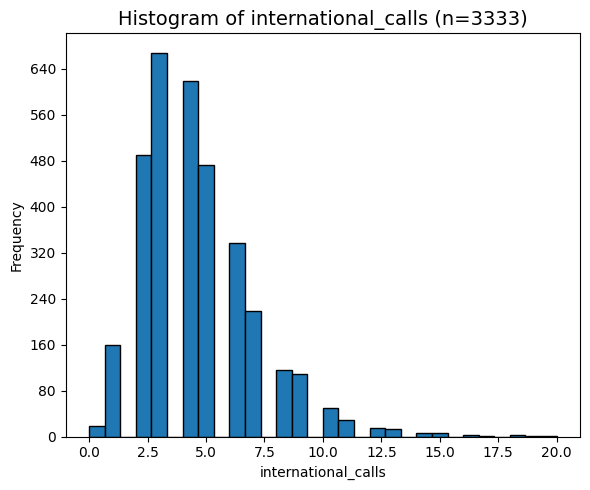

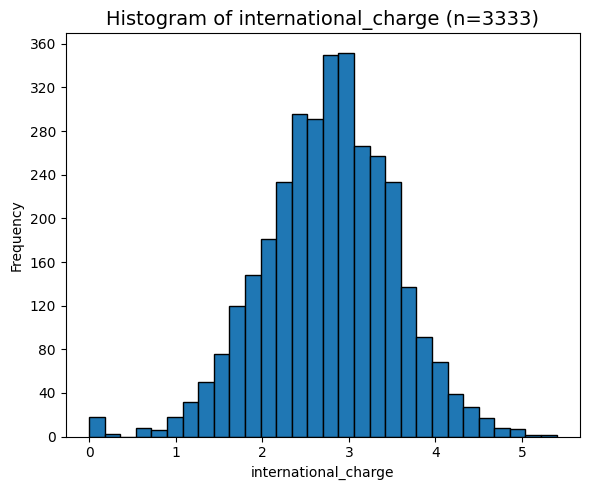

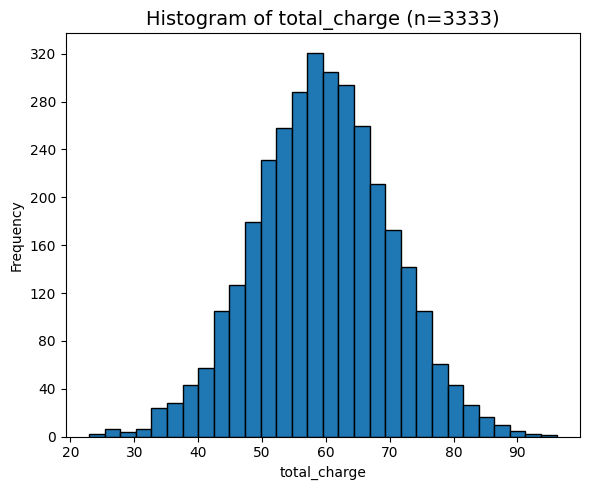

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# Select numeric columns and remove 'churn'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'churn' in numeric_cols:
    numeric_cols.remove('churn')

# Loop through columns and plot
for c in numeric_cols:
    data = df[c].dropna()
    if data.empty:
        print(f"Skipping {c} — no data to plot.")
        continue

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.hist(data, bins=30, edgecolor='black')
    ax.set_title(f'Histogram of {c} (n={len(data)})', fontsize=14)
    ax.set_xlabel(c)
    ax.set_ylabel('Frequency')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()  # use show() instead of display()
    plt.close(fig)


In [10]:
import warnings
warnings.filterwarnings("ignore")

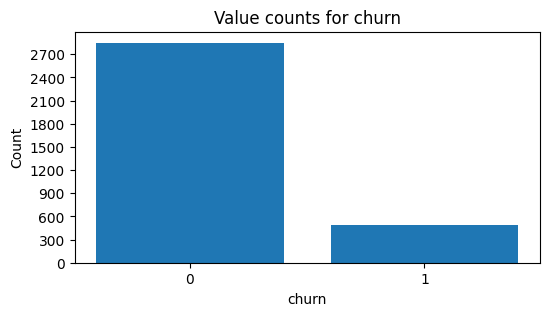

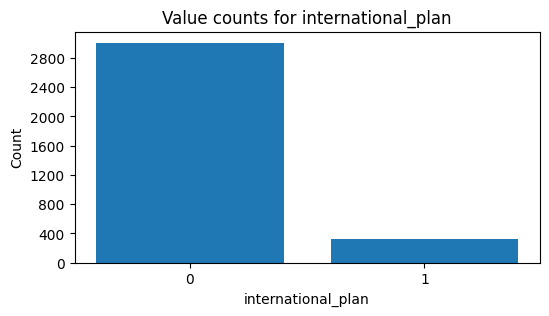

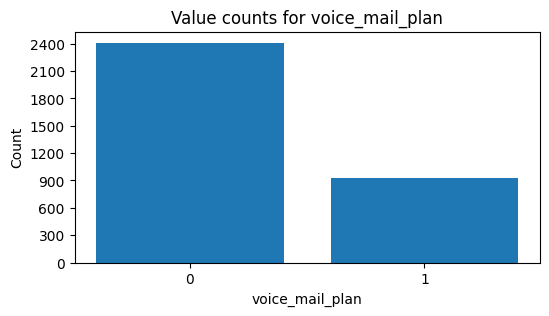

In [11]:
# Plot bar charts for low-cardinality columns
cat_cols = [c for c in df.columns if df[c].nunique() <= 10 and c not in numeric_cols]
# fallback: include known categorical columns if detected
for c in ['voice_mail_plan', 'international_plan', 'churn']:
    if c in df.columns:
        cat_cols.append(c)
cat_cols = sorted(list(set(cat_cols)))

for c in cat_cols:
    vc = df[c].value_counts(dropna=False)
    fig = plt.figure(figsize=(6,3))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f'Value counts for {c}')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    display(fig)
    plt.close(fig)


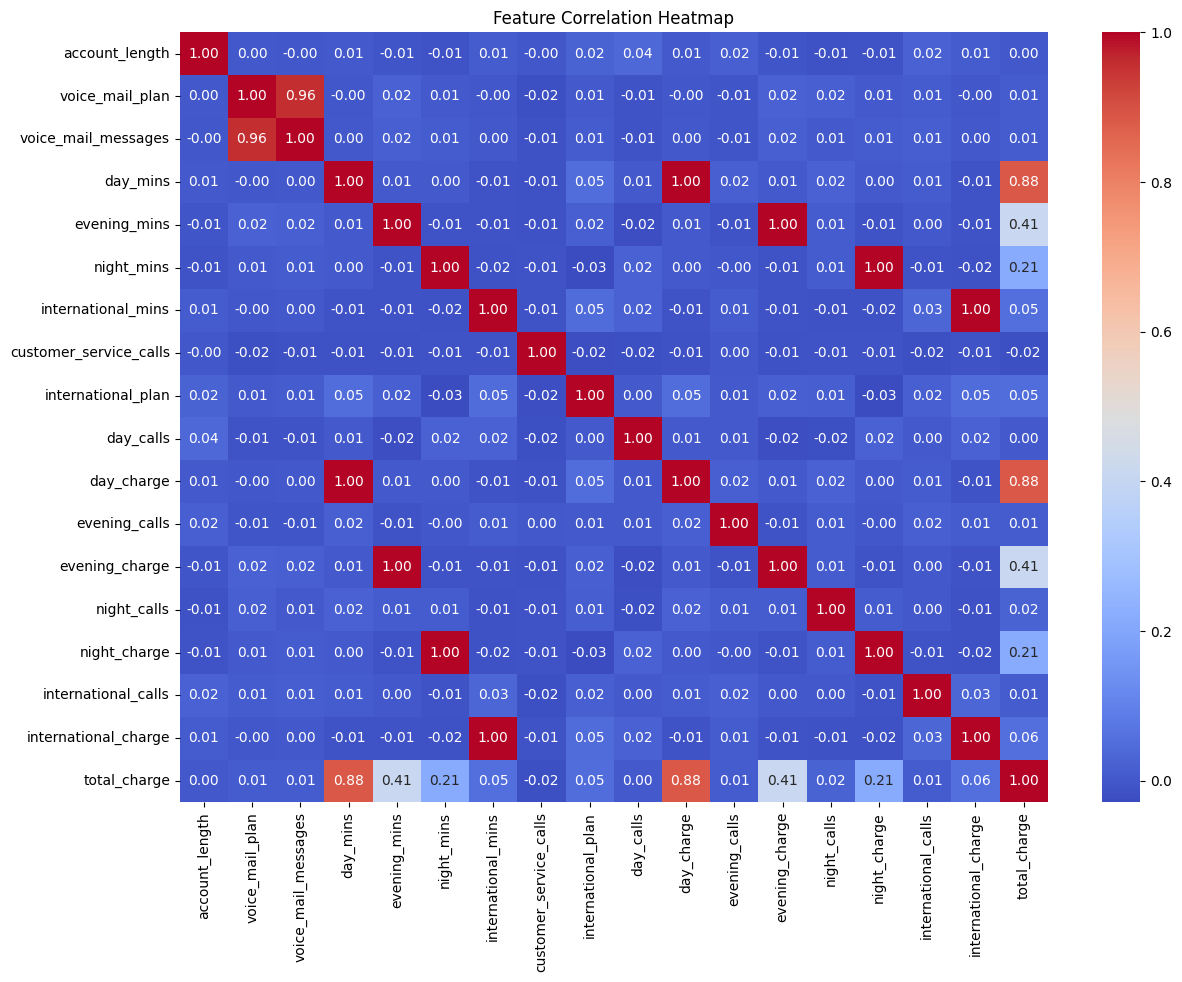

In [12]:
x = df.drop('churn', axis=1)
y = df['churn']
corr_matrix = x.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

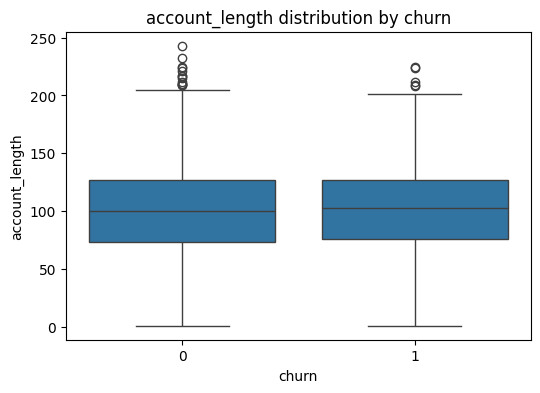

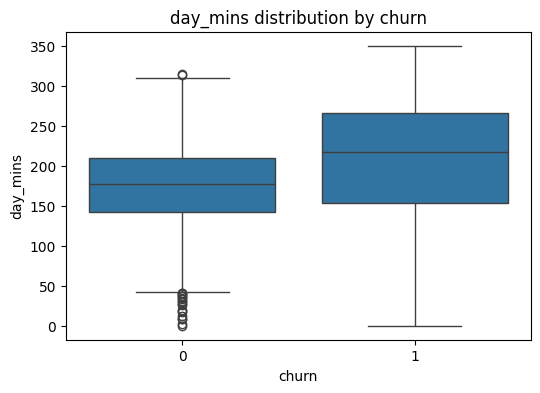

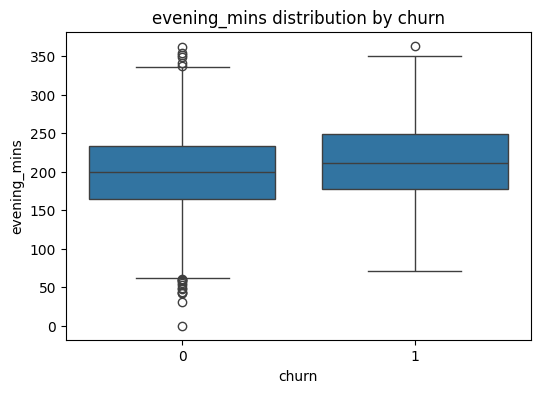

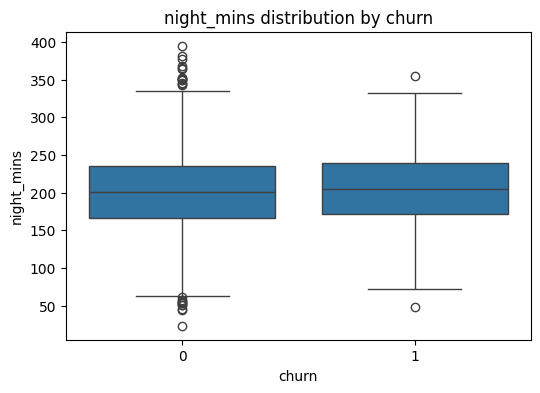

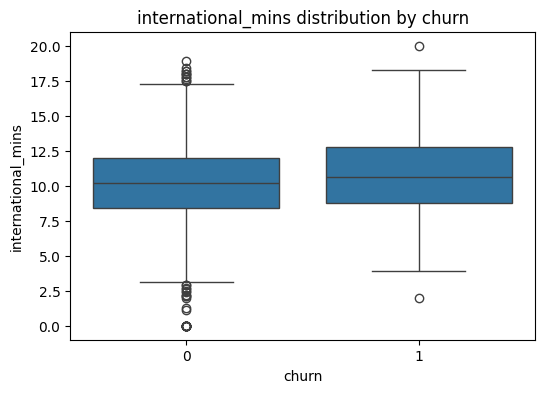

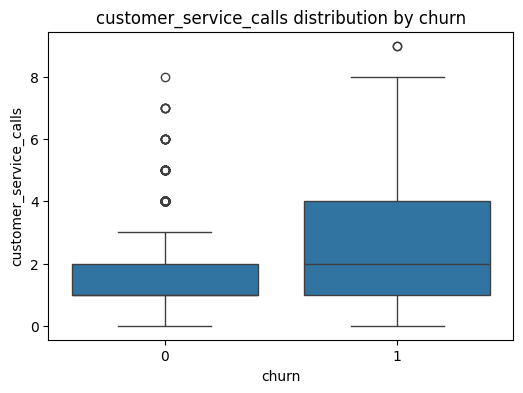

In [13]:
features_to_plot = ['account_length', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} distribution by churn')
    plt.show()

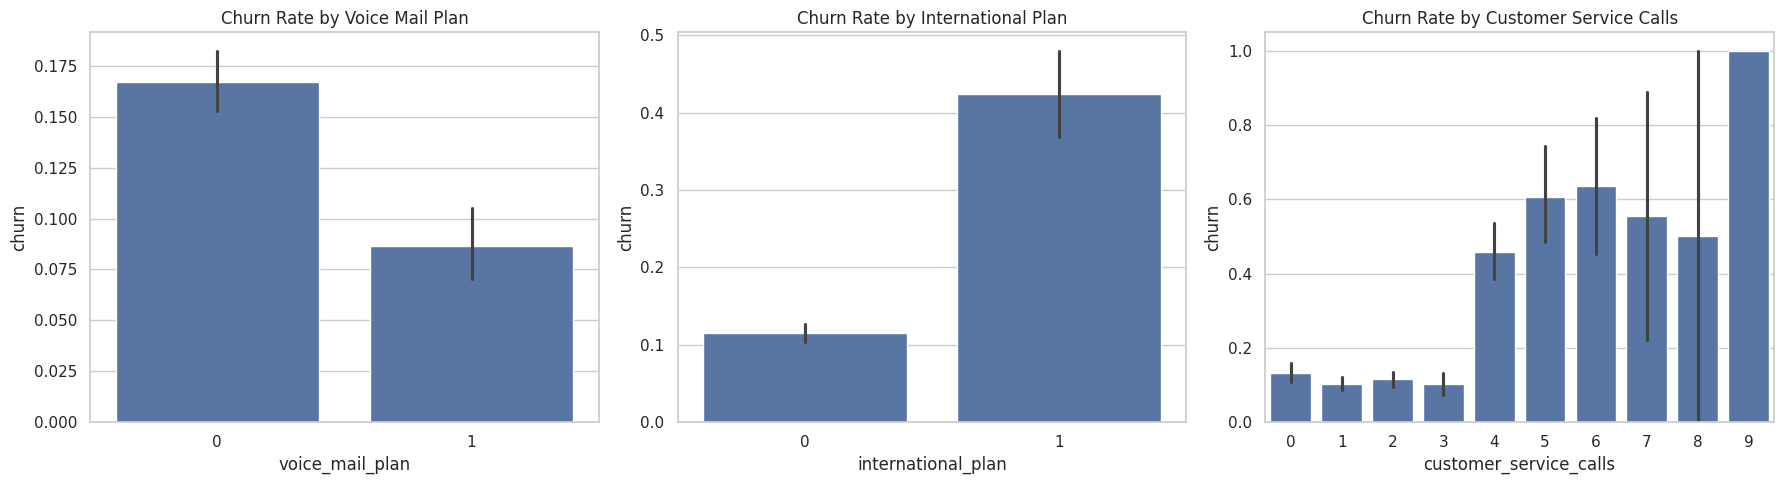

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot categorical features vs churn
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Voice mail plan vs churn
sns.barplot(x="voice_mail_plan", y="churn", data=df, ax=axes[0])
axes[0].set_title("Churn Rate by Voice Mail Plan")

# International plan vs churn
sns.barplot(x="international_plan", y="churn", data=df, ax=axes[1])
axes[1].set_title("Churn Rate by International Plan")

# Customer service calls vs churn
sns.barplot(x="customer_service_calls", y="churn", data=df, ax=axes[2])
axes[2].set_title("Churn Rate by Customer Service Calls")

plt.tight_layout()
plt.show()


In [15]:
# Average values per churn group
df.groupby('churn').mean()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
churn,,,,,,,,,,,,,,,,,,
0,100.793684,0.295439,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.065263,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,58.448807
1,102.664596,0.165631,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,0.283644,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,65.355963


In [16]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [17]:
x

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53


In [18]:
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [19]:
y.unique()

array([0, 1])

In [20]:
x.shape

(3333, 18)

In [21]:
kbest_clf = SelectKBest(score_func=chi2, k=9)
kbest_cvalues  = kbest_clf.fit_transform(x,y)
kbest_cvalues

array([[ 25.  , 265.1 , 197.4 , ...,  45.07,  16.78,  75.56],
       [ 26.  , 161.6 , 195.5 , ...,  27.47,  16.62,  59.24],
       [  0.  , 243.4 , 121.2 , ...,  41.38,  10.3 ,  62.29],
       ...,
       [  0.  , 180.8 , 288.8 , ...,  30.74,  24.55,  67.74],
       [  0.  , 213.8 , 159.6 , ...,  36.35,  13.57,  57.53],
       [ 25.  , 234.4 , 265.9 , ...,  39.85,  22.6 ,  77.01]])

In [22]:
kbest_cvalues.shape

(3333, 9)

In [23]:
ffilter = kbest_clf.get_support()
ffilter

array([False, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True])

In [24]:
x.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge'],
      dtype='object')

In [25]:
kbest_cfeatures = x.columns[ffilter]
kbest_cfeatures

Index(['voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'customer_service_calls', 'international_plan', 'day_charge', 'evening_charge', 'total_charge'], dtype='object')

In [26]:
kbest_cdata = pd.DataFrame(kbest_cvalues, columns=kbest_cfeatures)
kbest_cdata

,voice_mail_messages,day_mins,evening_mins,night_mins,customer_service_calls,international_plan,day_charge,evening_charge,total_charge
0,25.0,265.1,197.4,244.7,1.0,0.0,45.07,16.78,75.56
1,26.0,161.6,195.5,254.4,1.0,0.0,27.47,16.62,59.24
2,0.0,243.4,121.2,162.6,0.0,0.0,41.38,10.30,62.29
3,0.0,299.4,61.9,196.9,2.0,1.0,50.90,5.26,66.80
4,0.0,166.7,148.3,186.9,3.0,1.0,28.34,12.61,52.09
...,...,...,...,...,...,...,...,...,...
3328,36.0,156.2,215.5,279.1,2.0,0.0,26.55,18.32,60.10
3329,0.0,231.1,153.4,191.3,3.0,0.0,39.29,13.04,63.53
3330,0.0,180.8,288.8,191.9,2.0,0.0,30.74,24.55,67.74
3331,0.0,213.8,159.6,139.2,2.0,1.0,36.35,13.57,57.53


In [27]:
kbest_clf.scores_

array([1.43041969e+01, 2.51569590e+01, 6.20628799e+02, 2.31416931e+03,
       3.67164781e+02, 5.34465062e+01, 1.18130812e+01, 1.60773588e+02,
       2.03244178e+02, 4.55305859e+00, 3.93399658e+02, 1.12615986e+00,
       3.12019307e+01, 4.80689125e-01, 2.40554205e+00, 1.25827693e+01,
       3.19059341e+00, 3.31440144e+02])

In [28]:
kbest_cscores = pd.DataFrame()
kbest_cscores['Features'] = x.columns
kbest_cscores['Score'] = kbest_clf.scores_
kbest_cscores

,Features,Score
0,account_length,14.304197
1,voice_mail_plan,25.156959
2,voice_mail_messages,620.628799
3,day_mins,2314.169315
4,evening_mins,367.164781
5,night_mins,53.446506
6,international_mins,11.813081
7,customer_service_calls,160.773588
8,international_plan,203.244178
9,day_calls,4.553059


In [29]:
# 1
kbest_cscores = pd.DataFrame()
kbest_cscores['Features'] = x.columns
kbest_cscores['Score'] = kbest_clf.scores_
kbest_cscores.sort_values(by='Score', ascending=False)

,Features,Score
3,day_mins,2314.169315
2,voice_mail_messages,620.628799
10,day_charge,393.399658
4,evening_mins,367.164781
17,total_charge,331.440144
8,international_plan,203.244178
7,customer_service_calls,160.773588
5,night_mins,53.446506
12,evening_charge,31.201931
1,voice_mail_plan,25.156959


In [30]:
kkbest_clf = SelectKBest(score_func=f_classif, k=9)
kkbest_cvalues  = kkbest_clf.fit_transform(x,y)
kkbest_cvalues

array([[  1.  ,  25.  , 265.1 , ...,  45.07,  16.78,  75.56],
       [  1.  ,  26.  , 161.6 , ...,  27.47,  16.62,  59.24],
       [  0.  ,   0.  , 243.4 , ...,  41.38,  10.3 ,  62.29],
       ...,
       [  0.  ,   0.  , 180.8 , ...,  30.74,  24.55,  67.74],
       [  0.  ,   0.  , 213.8 , ...,  36.35,  13.57,  57.53],
       [  1.  ,  25.  , 234.4 , ...,  39.85,  22.6 ,  77.01]])

In [31]:
fffilter = kkbest_clf.get_support()
fffilter

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True])

In [32]:
kkbest_clf.scores_

array([9.11598199e-01, 3.51229436e+01, 2.70359117e+01, 1.46350785e+02,
       2.89325766e+01, 4.20149555e+00, 1.55834680e+01, 1.51767013e+02,
       2.41206004e+02, 1.13541243e+00, 1.46350657e+02, 2.83994375e-01,
       2.89264438e+01, 1.25631319e-01, 4.20213628e+00, 9.32794537e+00,
       1.55925806e+01, 1.88708417e+02])

In [33]:
kkbest_cscores = pd.DataFrame()
kkbest_cscores['Features'] = x.columns
kkbest_cscores['Score'] = kkbest_clf.scores_
kkbest_cscores

,Features,Score
0,account_length,0.911598
1,voice_mail_plan,35.122944
2,voice_mail_messages,27.035912
3,day_mins,146.350785
4,evening_mins,28.932577
5,night_mins,4.201496
6,international_mins,15.583468
7,customer_service_calls,151.767013
8,international_plan,241.206004
9,day_calls,1.135412


In [34]:
# 2
kkbest_cscores.sort_values(by='Score', ascending=False)

,Features,Score
8,international_plan,241.206004
17,total_charge,188.708417
7,customer_service_calls,151.767013
3,day_mins,146.350785
10,day_charge,146.350657
1,voice_mail_plan,35.122944
4,evening_mins,28.932577
12,evening_charge,28.926444
2,voice_mail_messages,27.035912
16,international_charge,15.592581


In [35]:
from sklearn.feature_selection import RFE   # Regressive feature elimination
from sklearn.linear_model import LogisticRegression

In [36]:
lreg = LogisticRegression(max_iter=400)
rfe = RFE(lreg, n_features_to_select=9)
rfe_values = rfe.fit_transform(x,y)
rfe_values

array([[ 1.  , 25.  , 10.  , ...,  3.  ,  2.7 , 75.56],
       [ 1.  , 26.  , 13.7 , ...,  3.  ,  3.7 , 59.24],
       [ 0.  ,  0.  , 12.2 , ...,  5.  ,  3.29, 62.29],
       ...,
       [ 0.  ,  0.  , 14.1 , ...,  6.  ,  3.81, 67.74],
       [ 0.  ,  0.  ,  5.  , ..., 10.  ,  1.35, 57.53],
       [ 1.  , 25.  , 13.7 , ...,  4.  ,  3.7 , 77.01]])

In [37]:
rfe_values.shape

(3333, 9)

In [38]:
rfe_filt = rfe.get_support()
rfe_filt

array([False,  True,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True])

In [39]:
rfe_features = x.columns[rfe_filt]
rfe_features

Index(['voice_mail_plan', 'voice_mail_messages', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'international_calls', 'international_charge', 'total_charge'], dtype='object')

In [40]:
rfe_data = pd.DataFrame(rfe_values, columns= rfe_features )
rfe_data

,voice_mail_plan,voice_mail_messages,international_mins,customer_service_calls,international_plan,day_calls,international_calls,international_charge,total_charge
0,1.0,25.0,10.0,1.0,0.0,110.0,3.0,2.70,75.56
1,1.0,26.0,13.7,1.0,0.0,123.0,3.0,3.70,59.24
2,0.0,0.0,12.2,0.0,0.0,114.0,5.0,3.29,62.29
3,0.0,0.0,6.6,2.0,1.0,71.0,7.0,1.78,66.80
4,0.0,0.0,10.1,3.0,1.0,113.0,3.0,2.73,52.09
...,...,...,...,...,...,...,...,...,...
3328,1.0,36.0,9.9,2.0,0.0,77.0,6.0,2.67,60.10
3329,0.0,0.0,9.6,3.0,0.0,57.0,4.0,2.59,63.53
3330,0.0,0.0,14.1,2.0,0.0,109.0,6.0,3.81,67.74
3331,0.0,0.0,5.0,2.0,1.0,105.0,10.0,1.35,57.53


In [41]:
rfe.ranking_

array([ 7,  1,  1,  4,  5, 10,  1,  1,  1,  1,  8,  6,  9,  3,  2,  1,  1,
        1])

In [42]:
rfe_rank = pd.DataFrame()
rfe_rank['Features'] = x.columns
rfe_rank['Rank'] = rfe.ranking_

In [43]:
rfe_rank

,Features,Rank
0,account_length,7
1,voice_mail_plan,1
2,voice_mail_messages,1
3,day_mins,4
4,evening_mins,5
5,night_mins,10
6,international_mins,1
7,customer_service_calls,1
8,international_plan,1
9,day_calls,1


In [44]:
# 3
rfe_rank.sort_values(by='Rank')

,Features,Rank
1,voice_mail_plan,1
2,voice_mail_messages,1
6,international_mins,1
7,customer_service_calls,1
9,day_calls,1
15,international_calls,1
8,international_plan,1
16,international_charge,1
17,total_charge,1
14,night_charge,2


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(x,y)

DecisionTreeClassifier(max_depth=6)

In [47]:
dtree.feature_importances_

array([5.76571271e-04, 1.27124224e-01, 4.38260091e-04, 0.00000000e+00,
       2.54087020e-03, 2.81875153e-03, 3.68199951e-03, 1.27071756e-01,
       8.05033631e-02, 0.00000000e+00, 2.79084057e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.43764656e-02,
       9.28870832e-02, 4.75189815e-01])

In [48]:
dtree_rank = pd.DataFrame()
dtree_rank['Features'] = x.columns
dtree_rank['Importance'] = dtree.feature_importances_
dtree_rank

,Features,Importance
0,account_length,0.000577
1,voice_mail_plan,0.127124
2,voice_mail_messages,0.000438
3,day_mins,0.000000
4,evening_mins,0.002541
5,night_mins,0.002819
6,international_mins,0.003682
7,customer_service_calls,0.127072
8,international_plan,0.080503
9,day_calls,0.000000


In [49]:
dtree_rank.sort_values(by='Importance', ascending=False)

,Features,Importance
17,total_charge,0.475190
1,voice_mail_plan,0.127124
7,customer_service_calls,0.127072
16,international_charge,0.092887
15,international_calls,0.084376
8,international_plan,0.080503
6,international_mins,0.003682
5,night_mins,0.002819
10,day_charge,0.002791
4,evening_mins,0.002541


In [50]:
# The k best features
k = 9
dtree_rank['Features'][:k]

,Features
0,account_length
1,voice_mail_plan
2,voice_mail_messages
3,day_mins
4,evening_mins
5,night_mins
6,international_mins
7,customer_service_calls
8,international_plan


In [51]:
n=df[['voice_mail_messages','customer_service_calls','international_plan','international_charge','international_calls','day_mins','evening_mins','night_mins','total_charge']]
n.head()

,voice_mail_messages,customer_service_calls,international_plan,international_charge,international_calls,day_mins,evening_mins,night_mins,total_charge
0,25,1,0,2.70,3,265.1,197.4,244.7,75.56
1,26,1,0,3.70,3,161.6,195.5,254.4,59.24
2,0,0,0,3.29,5,243.4,121.2,162.6,62.29
3,0,2,1,1.78,7,299.4,61.9,196.9,66.80
4,0,3,1,2.73,3,166.7,148.3,186.9,52.09


In [52]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling_data =scaling.fit_transform(n)
scaled_feature= pd.DataFrame(scaling_data, columns=n.columns)
scaled_feature.head()

,voice_mail_messages,customer_service_calls,international_plan,international_charge,international_calls,day_mins,evening_mins,night_mins,total_charge
0,1.234883,-0.427932,-0.327580,-0.085690,-0.601195,1.566767,-0.070610,0.866743,1.534209
1,1.307948,-0.427932,-0.327580,1.241169,-0.601195,-0.333738,-0.108080,1.058571,-0.019975
2,-0.591760,-1.188218,-0.327580,0.697156,0.211534,1.168304,-1.573383,-0.756869,0.270482
3,-0.591760,0.332354,3.052685,-1.306401,1.024263,2.196596,-2.742865,-0.078551,0.699978
4,-0.591760,1.092641,3.052685,-0.045885,-0.601195,-0.240090,-1.038932,-0.276311,-0.700883


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_feature,y, train_size=0.80, random_state=150)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 9)
(667, 9)
(2666,)
(667,)


In [54]:
!pip install xgboost
!pip install lightgbm

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [56]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    'XGB':XGBClassifier(n_estimators=200,),
    'LGBM':LGBMClassifier(n_estimators=200)
}

In [57]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append([name, acc, prec, rec, f1, roc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
print(results_df)

[LightGBM] [Info] Number of positive: 393, number of negative: 2273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147412 -> initscore=-1.755046
[LightGBM] [Info] Start training from score -1.755046
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.872564   0.558140  0.266667  0.360902  0.829540
1        Decision Tree  0.961019   0.840426  0.877778  0.858696  0.925891
2        Random Forest  0.983508   1.000000  0.877778  0.934911  0.923859
3    Gradient Boosting  0.982009   0.987500  0.877778  0.929412  0.934469
4                  SVM  0.943028   0.871429  0.677778  0.762500  0.895263
5  

In [58]:
best_model = results_df.sort_values(by="ROC AUC", ascending=False).iloc[0]
print("Best model is:", best_model["Model"])

Best model is: LGBM


In [59]:
import pandas as pd
input_file = "user input.csv"
user_df = pd.read_csv(input_file)

selected_features = ['voice_mail_messages','international_plan','international_charge','total_charge','customer_service_calls','evening_mins','day_mins','international_calls','night_mins']

best_model = models['LGBM']
scaler = scaling

X_selected = user_df[selected_features]

X_scaled = scaler.transform(X_selected)

preds = best_model.predict(X_scaled)

if preds.ndim == 2 or best_model._objective == 'binary':
    probs = best_model.predict_proba(X_scaled)[:, 1]
    preds = (probs >= 0.5).astype(int)
else:
    probs = preds

user_df['churn_prediction'] = preds
user_df['churn_probability'] = probs


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', '{:.2f}'.format)

print(user_df)



     account_length  voice_mail_plan  voice_mail_messages  day_mins  evening_mins  night_mins  international_mins  customer_service_calls  \
0               133                0                    0    201.70        169.40      286.30                6.00                       0   
1               168                1                   42     97.40        203.60      173.90               11.40                       2   
2               117                0                    0    167.10        177.50      249.40               14.10                       2   
3               105                0                    0    150.00        293.80      250.70               10.30                       3   
4               159                0                    0    167.40        143.80      140.10               10.30                       0   
..              ...              ...                  ...       ...           ...         ...                 ...                     ...   
395          

In [60]:
complete_train =LGBMClassifier(n_estimators=200)

In [61]:
complete_train.fit(scaled_feature,y)

[LightGBM] [Info] Number of positive: 483, number of negative: 2850
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144914 -> initscore=-1.775058
[LightGBM] [Info] Start training from score -1.775058


LGBMClassifier(n_estimators=200)

In [62]:
import pandas as pd
input_file = "user input.csv"
user_df = pd.read_csv(input_file)

selected_features = ['voice_mail_messages','customer_service_calls','international_plan','international_charge','international_calls','day_mins','evening_mins','night_mins','total_charge']

best_model = complete_train

scaler = scaling

X_selected = user_df[selected_features]

X_scaled = scaler.transform(X_selected)

preds = best_model.predict(X_scaled)

if preds.ndim == 2 or best_model._objective == 'binary':
    probs = best_model.predict_proba(X_scaled)[:, 1]
    preds = (probs >= 0.5).astype(int)
else:
    probs = preds

user_df['churn_prediction'] = preds
user_df['churn_probability'] = probs


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', '{:.2f}'.format)

print(user_df)



     account_length  voice_mail_plan  voice_mail_messages  day_mins  evening_mins  night_mins  international_mins  customer_service_calls  \
0               133                0                    0    201.70        169.40      286.30                6.00                       0   
1               168                1                   42     97.40        203.60      173.90               11.40                       2   
2               117                0                    0    167.10        177.50      249.40               14.10                       2   
3               105                0                    0    150.00        293.80      250.70               10.30                       3   
4               159                0                    0    167.40        143.80      140.10               10.30                       0   
..              ...              ...                  ...       ...           ...         ...                 ...                     ...   
395          

In [63]:
import joblib

joblib.dump(complete_train, "trained_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']